<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_37_Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement & Objective
 

Imagine yourself working as a data scientist in an insurance company. Your manager asked you to come up with a data science solution to estimate the medical cost of an individual who has bought health insurance in the institution. **Build a machine learning model to estimate the medical cost of an individual**.

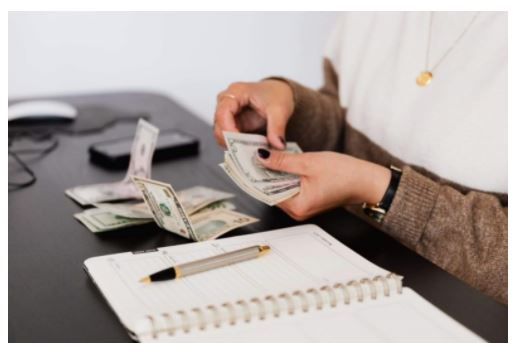

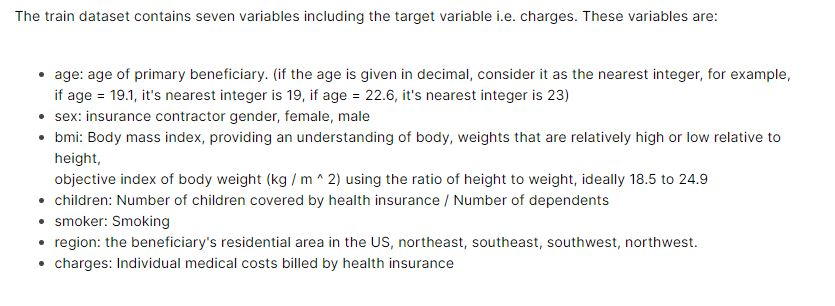

## Evaluation Matrix

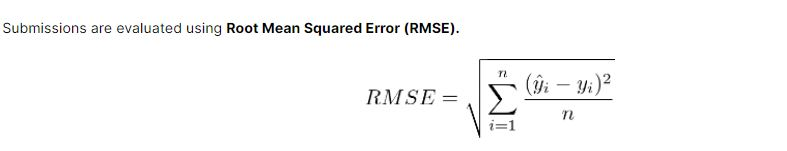

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Data Processing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train = pd.read_csv("/content/drive/MyDrive/dphi/Train_Data_medical_cost.csv")
test = pd.read_csv("/content/drive/MyDrive/dphi/Medical_csot_test.csv")
sub = pd.read_csv("/content/drive/MyDrive/dphi/Sample_Submission_medical_cost.csv")

In [4]:
train.shape,test.shape

((3630, 7), (492, 6))

In [5]:
train.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


## Summary Ststistics - Train data

In [8]:
train.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


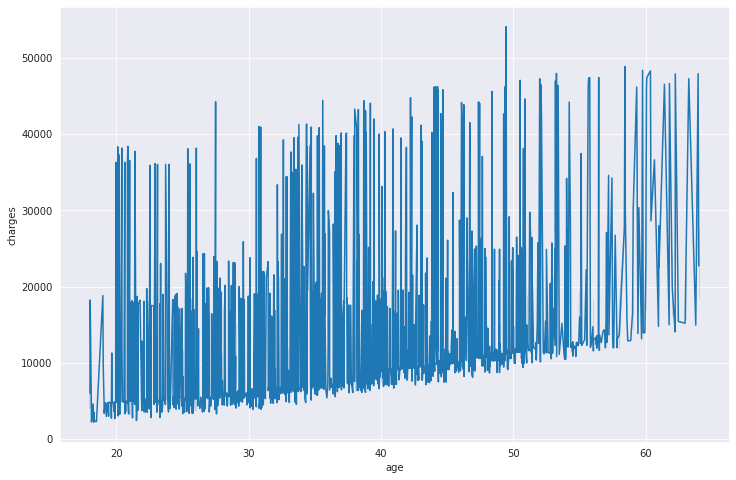

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='charges',data=train)

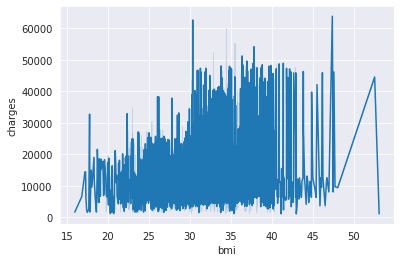

In [17]:
sns.lineplot(x='bmi',y='charges',data=train)

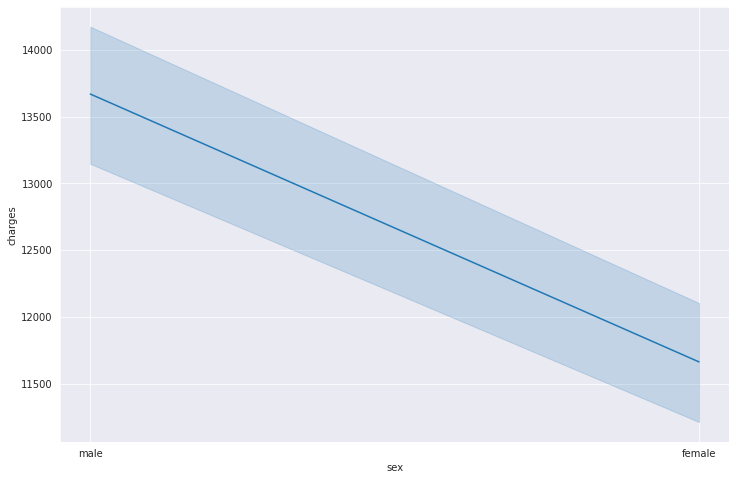

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='sex',y='charges',data=train)

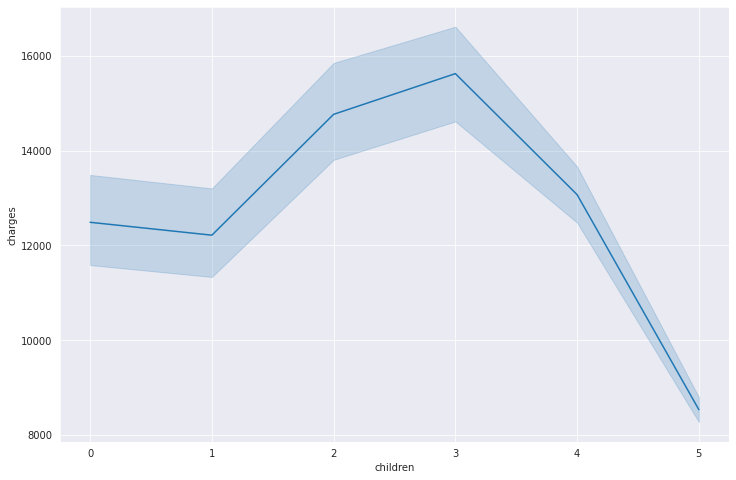

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='children',y='charges',data=train)

## Summary Statistics - Test data

In [11]:
test.describe()

,age,bmi,children
count,492.000000,492.000000,492.000000
mean,38.840527,30.682976,2.512195
std,12.408765,5.426067,1.684315
min,18.000000,16.815000,0.000000
25%,28.754692,26.991596,1.000000
50%,39.051877,29.979531,2.000000
75%,49.000001,33.776529,4.000000
max,64.000000,50.380000,5.000000


In [35]:
train['age_group']  = pd.cut(train['age'],bins=[15, 30, 45, 60,75],labels=['15-30','31-45','46-60','61-75'])

In [36]:
test['age_group'] = pd.cut(test['age'],bins=[15, 30, 45, 60,75],labels=['15-30','31-45','46-60','61-75'])

In [37]:
train.head()

,age,sex,bmi,smoker,region,children,charges,age_group
0,21.000000,male,25.745000,no,northeast,2,3279.868550,15-30
1,36.976978,female,25.744165,yes,southeast,3,21454.494239,31-45
2,18.000000,male,30.030000,no,southeast,1,1720.353700,15-30
3,37.000000,male,30.676891,no,northeast,3,6801.437542,31-45
4,58.000000,male,32.010000,no,southeast,1,11946.625900,46-60


In [40]:
train.isnull().sum()

age          0
sex          0
bmi          0
smoker       0
region       0
children     0
charges      0
age_group    0
dtype: int64

In [46]:
train['bmi_bins']=pd.cut(train['bmi'],bins=[15, 30, 45, 60],labels=['15-30','31-45','46-60'])

In [48]:
test['bmi_bins']= pd.cut(test['bmi'],bins=[15, 30, 45, 60],labels=['15-30','31-45','46-60'])

In [49]:
train.head()

,age,sex,bmi,smoker,region,children,charges,age_group,bmi_bins
0,21.000000,male,25.745000,no,northeast,2,3279.868550,15-30,15-30
1,36.976978,female,25.744165,yes,southeast,3,21454.494239,31-45,15-30
2,18.000000,male,30.030000,no,southeast,1,1720.353700,15-30,31-45
3,37.000000,male,30.676891,no,northeast,3,6801.437542,31-45,31-45
4,58.000000,male,32.010000,no,southeast,1,11946.625900,46-60,31-45


In [50]:
train_new = train[['age_group','bmi_bins','sex','smoker','region','children','charges']]
test_new = test[['age_group','bmi_bins','sex','smoker','region','children']]

In [53]:
train_new.to_csv("train_processed.csv",index=False)

In [54]:
test_new.to_csv("test_processed.csv",index=False)

In [51]:
train_new.isnull().sum()

age_group    0
bmi_bins     0
sex          0
smoker       0
region       0
children     0
charges      0
dtype: int64

In [52]:
test_new.isnull().sum()

age_group    0
bmi_bins     0
sex          0
smoker       0
region       0
children     0
dtype: int64

In [56]:
pip install pycaret[full]

     |████████████████████████████████| 166.7MB 69kB/s 
     |████████████████████████████████| 3.6MB 34.1MB/s 
     |████████████████████████████████| 348kB 36.3MB/s 
     |████████████████████████████████| 358kB 38.0MB/s 
     |████████████████████████████████| 49.4MB 104kB/s 
     |████████████████████████████████| 69.2MB 79kB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 307kB 48.6MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 645kB 30.8MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 552kB 40.7MB/s 
     |████████████████████████████████| 7.6MB 26.4MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 3.2MB 27.5MB/s 
     |████████████████████████████████| 143kB 46.3MB/s 
     |████████████████████████████████| 133kB 50.5MB/s 
  

In [1]:
import pandas as pd
import numpy as np
import pycaret
from pycaret.regression import *

In [34]:
train = pd.read_csv("/content/train_processed.csv")
test = pd.read_csv("/content/test_processed.csv")

In [3]:
reg = setup(data = train, target = 'charges',use_gpu=True,preprocess=True,log_data=True,log_experiment=True,normalize=True)

,Description,Value
0,session_id,7339
1,Target,charges
2,Original Data,"(3630, 7)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2540, 19)"


In [4]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2187.7312,1.964724e+07,4432.5211,0.8347,0.3657,0.2035
1,2126.5531,1.667692e+07,4083.7381,0.8460,0.3088,0.2106
2,2063.3185,1.471740e+07,3836.3259,0.8824,0.3040,0.1890
3,1907.1995,1.164621e+07,3412.6537,0.8963,0.2940,0.1993
4,2249.6154,1.892641e+07,4350.4495,0.8272,0.3197,0.1999
5,1923.3445,1.280313e+07,3578.1455,0.8885,0.3179,0.2323
6,2110.7967,1.600789e+07,4000.9862,0.8742,0.3186,0.2108
7,1692.6690,1.124144e+07,3352.8260,0.8790,0.3075,0.1721
8,2054.6945,1.485916e+07,3854.7579,0.8754,0.3200,0.1967
9,1945.7391,1.214243e+07,3484.5983,0.8863,0.2960,0.1980


In [5]:
# tune hyperparameters with optuna
tuned_cat_optuna = tune_model(cat, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2328.4812,1.874862e+07,4329.9674,0.8423,0.3493,0.2212
1,2286.7388,1.894542e+07,4352.6334,0.8250,0.3134,0.2244
2,2299.7496,1.670748e+07,4087.4781,0.8665,0.3244,0.2261
3,2045.1874,1.400949e+07,3742.9256,0.8753,0.3064,0.2220
4,2377.0779,2.029022e+07,4504.4664,0.8148,0.3474,0.2131
5,1822.8537,9.968659e+06,3157.3184,0.9132,0.2793,0.2164
6,2132.0335,1.550957e+07,3938.2188,0.8781,0.3081,0.2123
7,1890.0170,1.339923e+07,3660.4954,0.8558,0.2871,0.1779
8,2163.3533,1.448573e+07,3806.0120,0.8786,0.3241,0.2074
9,2129.1307,1.310797e+07,3620.4928,0.8773,0.3148,0.2250


## Evaluate Model

In [8]:
evaluate_model(tuned_cat_optuna)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Prediction on validation set

In [9]:
hold_out = predict_model(tuned_cat_optuna)
hold_out

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2219.857,1.703737e+07,4127.6349,0.8575,0.3341,0.2147


,age_group_15-30,age_group_31-45,age_group_46-60,age_group_61-75,bmi_bins_15-30,bmi_bins_31-45,bmi_bins_46-60,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,charges,Label
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12479.708984,12606.005670
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41949.242188,40240.526870
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10576.416016,12663.394217
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5385.337891,6680.744430
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1149.395874,3022.069264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8347.164062,12684.948719
1086,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4402.463867,4528.315135
1087,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2104.113281,3110.749717
1088,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10607.005859,12663.394217


## Predictions on the test data

In [11]:
# predictions on new dataset
cat_pred_new = predict_model(tuned_cat_optuna, data = test) #new_data is pd dataframe

In [12]:
cat_pred_new

,age_group,bmi_bins,sex,smoker,region,children,Label
0,31-45,15-30,male,no,southwest,2,8104.492699
1,46-60,31-45,male,no,southwest,1,11736.472233
2,46-60,15-30,female,no,northeast,2,11856.538634
3,31-45,31-45,male,no,northeast,3,8025.907392
4,46-60,31-45,male,yes,northeast,4,32925.999882
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,11542.668545
488,31-45,31-45,male,no,southwest,5,7580.768211
489,46-60,15-30,male,no,northeast,4,16486.905073
490,31-45,15-30,female,no,southeast,5,9871.630684


In [16]:
test['prediction'] = cat_pred_new['Label']

In [18]:
test[['prediction']].to_csv('dphi_pycaret.csv',index=False)

**Submission successful! Your score is 4327.975864960259**

## Analyzing model performance in PyCaret 

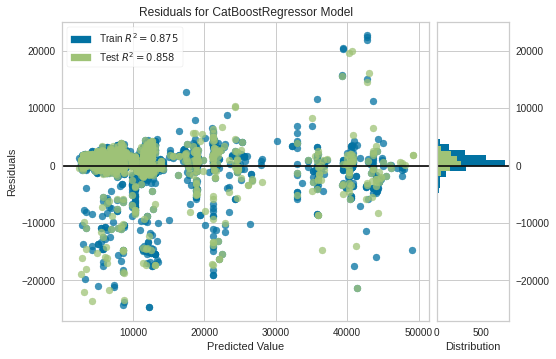

In [17]:
plot_model(tuned_cat_optuna)

## Comapre Models

In [43]:
best = compare_models(n_select = 15,sort='RMSE')
compare_model_results = pull()

IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:59:31
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.009
lightgbm,Light Gradient Boosting Machine,2070.4026,1.449109e+07,3791.1892,0.8718,0.3112,0.2034,0.067
rf,Random Forest Regressor,2009.1282,1.476265e+07,3827.3612,0.8698,0.3170,0.1995,1.056
catboost,CatBoost Regressor,2026.1661,1.486682e+07,3838.7002,0.8690,0.3152,0.2012,0.750
gbr,Gradient Boosting Regressor,2155.5741,1.563318e+07,3934.3943,0.8616,0.3144,0.2123,0.151
et,Extra Trees Regressor,2047.3644,1.609645e+07,3994.4321,0.8584,0.3230,0.2033,1.059
dt,Decision Tree Regressor,2050.6430,1.613646e+07,3999.8503,0.8581,0.3234,0.2036,0.012
ada,AdaBoost Regressor,4806.2815,3.294670e+07,5730.1957,0.7095,0.5840,0.6834,0.069
lasso,Lasso Regression,4073.4930,3.327169e+07,5762.1043,0.7046,0.4531,0.3936,0.018
ridge,Ridge Regression,4076.3754,3.327201e+07,5762.1504,0.7046,0.4534,0.3947,0.013


XGBoostError: ignored

## Build Lightgbm Models based on the Comparison between models

In [21]:
lgb = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2148.9362,1.647777e+07,4059.2824,0.8614,0.3556,0.2056
1,2250.4202,1.761402e+07,4196.9061,0.8373,0.3151,0.2221
2,2151.0736,1.523171e+07,3902.7827,0.8783,0.3049,0.1980
3,2048.5623,1.294756e+07,3598.2714,0.8847,0.2955,0.2101
4,2352.3694,1.981786e+07,4451.7251,0.8191,0.3294,0.2048
5,1835.8305,1.102613e+07,3320.5624,0.9039,0.2987,0.2163
6,2049.0498,1.423738e+07,3773.2457,0.8881,0.3068,0.2041
7,1815.7999,1.187105e+07,3445.4387,0.8723,0.3009,0.1756
8,2071.2445,1.369629e+07,3700.8505,0.8852,0.3115,0.1961
9,1980.7393,1.199117e+07,3462.8265,0.8877,0.2938,0.2013


In [22]:
# tune hyperparameters with optuna
tuned_lgb_optuna = tune_model(lgb, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2573.7314,2.226581e+07,4718.6660,0.8127,0.3758,0.2511
1,2349.7840,1.976388e+07,4445.6584,0.8175,0.3227,0.2345
2,2474.1136,1.744127e+07,4176.2747,0.8607,0.3324,0.2450
3,2222.2148,1.526345e+07,3906.8467,0.8641,0.3153,0.2376
4,2584.3118,2.052398e+07,4530.3403,0.8126,0.3505,0.2466
5,1979.6495,1.108588e+07,3329.5465,0.9034,0.2851,0.2280
6,2353.2968,1.705702e+07,4130.0144,0.8660,0.3323,0.2347
7,2168.5644,1.627263e+07,4033.9350,0.8249,0.3156,0.2053
8,2338.4664,1.606900e+07,4008.6152,0.8653,0.3383,0.2264
9,2402.6096,1.598714e+07,3998.3920,0.8503,0.3223,0.2422


In [23]:
evaluate_model(tuned_lgb_optuna)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

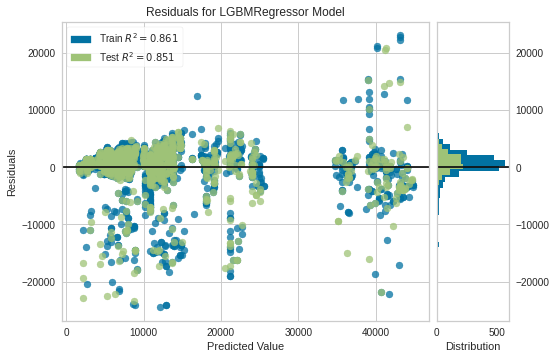

In [41]:
plot_model(tuned_lgb_optuna)

In [25]:
hold_out = predict_model(tuned_lgb_optuna)
hold_out

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2393.4639,1.783948e+07,4223.6811,0.8508,0.3428,0.2336


,age_group_15-30,age_group_31-45,age_group_46-60,age_group_61-75,bmi_bins_15-30,bmi_bins_31-45,bmi_bins_46-60,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,charges,Label
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12479.708984,13090.532776
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41949.242188,41370.495344
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10576.416016,14689.842127
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5385.337891,6249.954866
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1149.395874,2547.312146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8347.164062,14414.162193
1086,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4402.463867,5203.914499
1087,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2104.113281,3042.991734
1088,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10607.005859,14689.842127


## Make Predictions

In [28]:
# predictions on new dataset
lgb_pred_new = predict_model(tuned_lgb_optuna, data = test) #new_data is pd dataframe

In [29]:
lgb_pred_new

,age_group,bmi_bins,sex,smoker,region,children,Label
0,31-45,15-30,male,no,southwest,2,7807.808882
1,46-60,31-45,male,no,southwest,1,12805.690329
2,46-60,15-30,female,no,northeast,2,11948.842058
3,31-45,31-45,male,no,northeast,3,7693.994232
4,46-60,31-45,male,yes,northeast,4,39179.511128
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,10884.098402
488,31-45,31-45,male,no,southwest,5,6850.623375
489,46-60,15-30,male,no,northeast,4,16272.533294
490,31-45,15-30,female,no,southeast,5,10050.164608


In [30]:
lgb_pred_new = lgb_pred_new.rename(columns={'Label':'prediction'})

In [31]:
lgb_pred_new[['prediction']].to_csv('dphi_pycaret_lgb.csv',index=False)

**Submission successful! Your score is 4383.9653643544.**

## Blend Models
Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome.

In [33]:
# train a voting regressor dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2073.6141,1.718108e+07,4145.0063,0.8555,0.3539,0.1947
1,2115.2947,1.686980e+07,4107.2860,0.8442,0.3071,0.2081
2,2063.3041,1.466489e+07,3829.4762,0.8828,0.2949,0.1886
3,1872.2095,1.183750e+07,3440.5662,0.8946,0.2878,0.1927
4,2209.2284,1.881792e+07,4337.9624,0.8282,0.3160,0.1946
5,1787.1181,1.110186e+07,3331.9447,0.9033,0.3014,0.2179
6,2069.1088,1.527388e+07,3908.1811,0.8800,0.3123,0.2062
7,1662.8218,1.135528e+07,3369.7596,0.8778,0.2908,0.1601
8,2018.5578,1.399997e+07,3741.6540,0.8826,0.3138,0.1916
9,1878.5635,1.159458e+07,3405.0820,0.8914,0.2887,0.1927


In [42]:
blender_specific 

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=7339,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, sub...
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                             

In [35]:
# predictions on new dataset
pred_new = predict_model(blender_specific, data = test) #new_data is pd dataframe

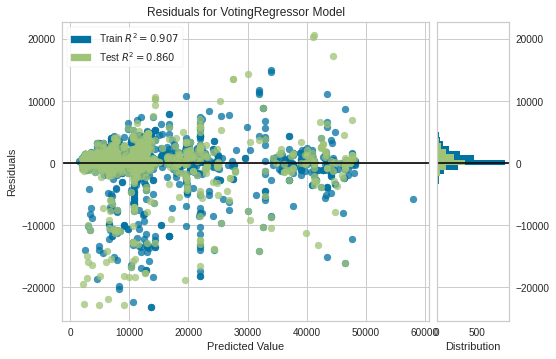

In [37]:
plot_model(blender_specific)

In [38]:
pred_new = pred_new.rename(columns={'Label':'prediction'})

In [39]:
pred_new 

,age_group,bmi_bins,sex,smoker,region,children,prediction
0,31-45,15-30,male,no,southwest,2,7671.285299
1,46-60,31-45,male,no,southwest,1,13019.387295
2,46-60,15-30,female,no,northeast,2,11207.319315
3,31-45,31-45,male,no,northeast,3,6487.387345
4,46-60,31-45,male,yes,northeast,4,32894.918420
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,12039.486851
488,31-45,31-45,male,no,southwest,5,6812.863180
489,46-60,15-30,male,no,northeast,4,15010.470549
490,31-45,15-30,female,no,southeast,5,9577.959029


In [40]:
pred_new[['prediction']].to_csv('dphi_pycaret_blender.csv',index=False)

**Blender Model Submission Submission successful! Your score is 4139.4076000571085**

##Save Models

In [47]:
save_model(blender_specific , '/content/drive/MyDrive/dphi/blender_specific_saved_06142021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                   criterion='mse',
                                                                   max_depth=None,
                                                                   max_features='auto',
                                                          

In [48]:
# Loading the saved model
blend_saved = load_model('/content/drive/MyDrive/dphi/blender_specific_saved_06142021')

Transformation Pipeline and Model Successfully Loaded


In [50]:
pred = blend_saved.predict(test)

In [51]:
pred

array([ 7671.28529883, 13019.38729537, 11207.31931537,  6487.38734517,
       32894.91841971,  6756.94587629, 11158.00771122,  8802.73721375,
        4508.98707917, 13575.86534358,  2303.76301584,  5647.97920232,
        7880.7543917 ,  5199.78140576,  3559.75857776, 10573.01627195,
        6568.63295978, 12087.62161109, 16261.49967322,  5194.71017525,
       11581.18006286, 11042.42411625, 39762.69784495, 12592.99617785,
       11147.81465002, 11147.81465002, 21941.61010815, 10608.09101456,
       11427.5843093 , 10613.93932731,  3559.75857776,  6487.38734517,
        5199.78140576, 10663.74059632,  3317.42682351,  5647.97920232,
       37610.88046196,  5199.78140576,  9577.95902911,  5408.85374368,
       23163.73775203,  7854.00780013, 10544.75922502,  9577.95902911,
        7274.72196037,  6048.24575679, 12179.48506599,  7395.58356938,
       10897.13206023, 40994.32723404, 10810.34891636,  4430.68988807,
       13291.52094929, 19688.40119143, 10897.13206023, 14288.86821497,
      

## Interfaces for  ML Models using Gradio

Gradio allows you to quickly create customizable UI components around your TensorFlow or PyTorch models, or even arbitrary Python functions. Mix and match components to support any combination of inputs and outputs. Our core library is free and open-source!

In [52]:
!pip install -q gradio

     |████████████████████████████████| 1.5MB 5.2MB/s 
     |████████████████████████████████| 1.9MB 31.4MB/s 
     |████████████████████████████████| 215kB 38.5MB/s 
     |████████████████████████████████| 962kB 29.4MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 


In [53]:
import gradio as gr

## Create Preprocessing functions

In [66]:
def encode_attributes(df): # Binning ages 
    age = df.age.values.tolist()[0]
    bmi = df.bmi.values.tolist()[0]
    if age > 15 and age <= 30:
      df['age_group'] = '15-30'
    elif age > 30 and age <= 45:
      df['age_group'] = '31-45'
    elif age > 45 and age <= 60:
      df['age_group'] = '46-60'
    else:
      df['age_group'] = '61-75'
    #
    if bmi > 15 and bmi <= 30:
      df['bmi_bins'] = '15-30'
    elif bmi > 30 and bmi <= 45:
      df['bmi_bins'] = '31-45'
    else:
      df['bmi_bins'] = '46-60'
      
    df = df[['age_group','bmi_bins','sex','smoker','region','children']]
    return df

## Create Predict Function

In [91]:
def predict_charges(age, bmi,sex,smoker,region,children):
    df = pd.DataFrame.from_dict({'sex': [sex], 'age': [age], 'smoker': [smoker],'bmi':[bmi],'region':[region],'children':[children]})
    df = encode_attributes(df)
    pred = blend_saved.predict(df).tolist()[0]
    return 'charges : '+str(pred)+" in rupees"

## Test Predict Function

In [92]:
predict_charges(age=17, bmi=30,sex='male',smoker='no',region='northwest',children=2)

'charges : 7384.45368738838 in rupees'

## Build a shareable UI 

In [93]:

sex = gr.inputs.Radio(['female', 'male'], label="sex")
smoker = gr.inputs.Radio(['no', 'yes'], label="smoker")
children = gr.inputs.Radio([2, 3, 1, 4, 5, 0], label="children")
region = gr.inputs.Radio(['northeast', 'southeast', 'northwest', 'southwest'], label="region")
age = gr.inputs.Slider(minimum=15, maximum=75, default=16, label="age")
bmi = gr.inputs.Slider(minimum=15, maximum=60, default=16, label="bmi")


gr.Interface(predict_charges, inputs=[age, bmi,sex,smoker,region,children], outputs="label",live=True).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://50268.gradio.app
Interface loading below...
